In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [ ]:

#This link describes how we get the equations: https://homepage.physics.uiowa.edu/~pkaaret/2018f_p4905/L23.html#:~:text=Differential%20equations,1%2C%202%2C%20...
def damped_oscillator(t, y, m, c, k):
    """
    Damped harmonic oscillator
    y[0] = position (x)
    y[1] = velocity (dx/dt)
    
    Parameters:
    m: mass
    c: damping coefficient
    k: spring constant
    """
    x, v = y
    dxdt = v
    dvdt = -(c/m) * v - (k/m) * x
    return [dxdt, dvdt]

In [3]:
#Parameters
m = 1.0  # mass
c = 0.5  # damping coefficient
k = 4.0  # spring constant

# Initial conditions: [position, velocity]
y0 = [1.0, 0.0]  # start at x=1, v=0

# Time span
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)

# Solve the system
solution = solve_ivp(damped_oscillator, t_span, y0, t_eval=t_eval, 
                    args=(m, c, k), method='RK45')

# Extract results
t = solution.t
x = solution.y[0]  # position
v = solution.y[1]  # velocity



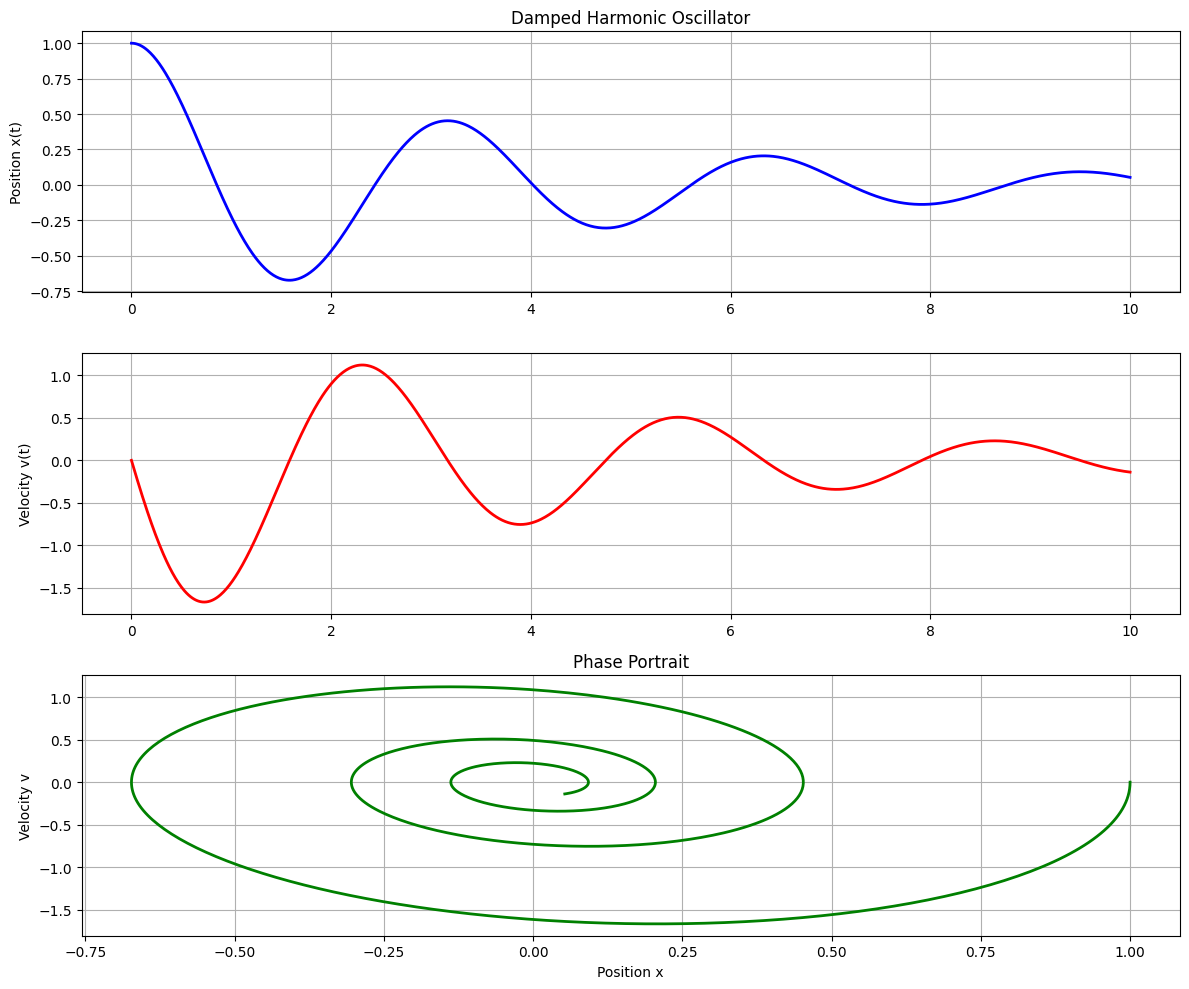

Natural frequency ωₙ = 2.000 rad/s
Damping ratio ζ = 0.125
System is underdamped


In [4]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Position vs time
ax1.plot(t, x, 'b-', linewidth=2)
ax1.set_ylabel('Position x(t)')
ax1.set_title('Damped Harmonic Oscillator')
ax1.grid(True)

# Velocity vs time
ax2.plot(t, v, 'r-', linewidth=2)
ax2.set_ylabel('Velocity v(t)')
ax2.grid(True)

# Phase portrait (velocity vs position)
ax3.plot(x, v, 'g-', linewidth=2)
ax3.set_xlabel('Position x')
ax3.set_ylabel('Velocity v')
ax3.set_title('Phase Portrait')
ax3.grid(True)

plt.tight_layout()
plt.show()

# Calculate system properties
omega_n = np.sqrt(k/m)  # natural frequency
zeta = c / (2 * np.sqrt(k*m))  # damping ratio

print(f"Natural frequency ωₙ = {omega_n:.3f} rad/s")
print(f"Damping ratio ζ = {zeta:.3f}")
if zeta < 1:
    print("System is underdamped")
elif zeta == 1:
    print("System is critically damped")
else:
    print("System is overdamped")